In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import *

From Wikipedia, the Bethe-Bloch formula is given by 
$$- \left\langle\frac{dE}{dx}\right\rangle = \frac{4 \pi}{m_e c^2} \frac{nz^2}{\beta^2}\left(\frac{e^2}{4\pi\varepsilon_0}\right)^2 \left[\ln \left(\frac{2m_e c^2 \beta^2}{I  (1-\beta^2)}\right) - \beta^2\right]$$

where $n = \frac{N_AZ\rho}{A}$ and $I_{Cu}/Z_{Cu} = 11 eV$, $I_{C}/Z_{C} = 15 eV$.

In [2]:
def electronDensity(Z, rho, A):
    return N_A * Z * rho /(A*1.)

def betheBlochFormula(n, z, I, beta = 0.9998):
    toreturn = 4*np.pi/(m_e*c**2) * n*z**2 /(beta**2) * (e**2/(4*np.pi*epsilon_0))**2\
    * (np.log(2*m_e*c**2*beta**2/(I*(1-beta**2)))-beta**2)
    return -1*toreturn

In [3]:
copper_density = 8920. #kg/m3
plastic_density = 940. #kg/m3  Low/High density Polyethilene
copper_I = 11*29*e #Joules
plastic_I = 15*6*e #Joules
copper_elec_dens = electronDensity(29, copper_density, 63.54)
plastic_elec_dens = electronDensity(6, plastic_density, 12)

In [4]:
print 'For Cu', -betheBlochFormula(copper_elec_dens, 1, copper_I)/e *1e-6, 'MeV'
print 'For C (Plastic)', -betheBlochFormula(plastic_elec_dens, 1, plastic_I)/e *1e-6, 'MeV'

For Cu 1.86298756486643 MeV
For C (Plastic) 0.23334606184953993 MeV


# Initial calibration with unknown threshold

In [5]:
import pandas as pd
from scipy import stats
from scipy.optimize import fsolve


In [6]:
raw_data = pd.read_excel('PMT_calib_fixed.xlsx')

def extract_data(r_data, PMT_num):
    PMT_data = r_data[r_data['PMT']==PMT_num]
    PMT_data = PMT_data.drop('PMT', axis=1)
    PMT_data = PMT_data.set_index(PMT_data['Voltage [V]'])
    PMT_data = PMT_data.sort_values('Voltage [V]')
    PMT_matrix = PMT_data.as_matrix()
    return PMT_matrix

In [7]:
matrices = [extract_data(raw_data, i) for i in range(1, 5)]

In [8]:
def line(x, m, b, des):
    return m*x + b - des

def get_calibrating_voltage(PMT_matrix, desired_count):
    V_data = PMT_matrix[:,0]
    count_data = PMT_matrix[:,1]
    log_count_data = np.log(count_data)
    V_mask=[v<=2.3 and v>=2 for v in V_data]
    V_data = V_data[V_mask]
    log_count_data = log_count_data[V_mask]
    plt.plot(V_data, log_count_data)
    slope, intercept, r_value, p_value, std_err = stats.linregress(V_data, log_count_data)
    plt.plot(np.linspace(2, 2.4, 100), slope*np.linspace(2, 2.4, 100)+intercept)
    print slope, intercept
    return fsolve(line, 2, (slope, intercept, desired_count))
    

10.958842155377365 -13.956723702263885
9.726194692053483 -12.396849923273296
11.976162611056242 -17.19367575838576
11.512213778591176 -15.755479007997733


[(1, 2.1404381384172018),
 (2, 2.2513275352346698),
 (3, 2.2289005773637784),
 (4, 2.193798646700288)]

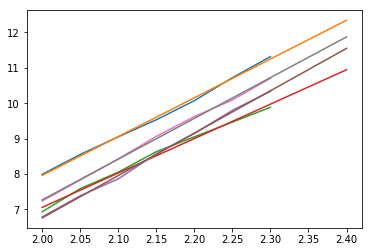

In [9]:
[(i+1,get_calibrating_voltage(matrix, 9.5)[0]) for i, matrix in enumerate(matrices)]

# Calibración Threshold

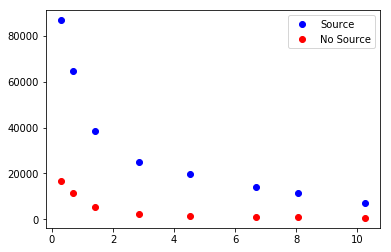

In [10]:
raw_data = pd.read_excel('Threshold_calib.xlsx')
raw_data= raw_data.sort_values('Threshold (V)')
mat = raw_data.as_matrix()
plt.plot(mat[:,0], mat[:,1], 'ob', label='Source')
plt.plot(mat[:,0], mat[:,2], 'or', label='No Source')
plt.legend(loc=0)


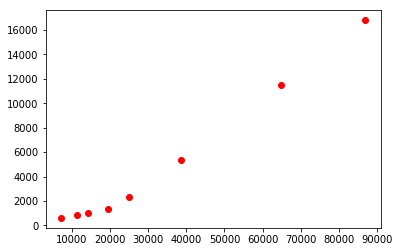

In [11]:
plt.plot(mat[:,1], mat[:,2], 'or', label='Source vs. No Source')

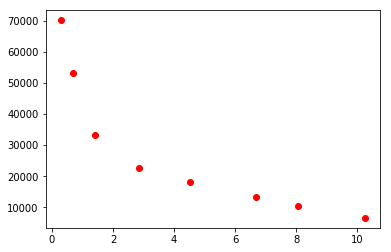

In [14]:
plt.plot(mat[:,0], mat[:,1]-mat[:,2], 'or', label='Source - No Source')


+ Compton scattering: Relation between incoming photon and electron energy
+ Muon decay products' energy
+ More precise threshold measurements


In [16]:
def electron_E(E_gamma):
    return E_gamma*(1-1./(1+2*(E_gamma/(511e-3))))

In [18]:
gamma_energies = [1.17, 1.33]
print [electron_E(E) for E in gamma_energies], 'MeV'

[0.9602946334619431, 1.115673289183223] MeV
